---
title: PCA (principal component analysis) demonstration notebook
subtitle: In this notebook we'll use synthetic data to study PCA / EOF (empirical orthogonal function) analysis
authors:
  - name: Katrin Bentel (katrin.bentel@ethz.ch)
---

### Prepare Python

In [1]:
# Load neccessary Python packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### Step 1: Create synthetic climate data with spatial correlation

In [2]:
# Create temporal and spatial spacing
n_time = 100  # Number of time steps
n_lat = 10    # Number of latitude points
n_lon = 10    # Number of longitude points
np.random.seed(42) # Set random seed for reproducibility (ensures same random numbers every time)

:::{hint} `np.random.seed(42)` &#9756;
:class: dropdown
The number 42 in np.random.seed(42) is an arbitrary choice. The specific value doesn't matter for setting the seed—any integer would work. However, 42 is commonly used as a reference to The Hitchhiker's Guide to the Galaxy, where it is humorously presented as "the answer to the ultimate question of life, the universe, and everything."
:::

In [3]:
# Generate a smooth spatial pattern (Gaussian function)
x, y = np.meshgrid(np.linspace(-1, 1, n_lon), np.linspace(-1, 1, n_lat))
spatial_pattern = np.exp(-5 * (x**2 + y**2))  # Gaussian decay from center

# Generate a time series with periodic variability (e.g., representing ENSO-like variability)
time_series = np.sin(np.linspace(0, 4*np.pi, n_time)) + 0.2 * np.random.randn(n_time)

# Create synthetic climate data with spatial correlation
data = np.array([time_series[t] * spatial_pattern + 0.1 * np.random.randn(n_lat, n_lon) for t in range(n_time)])


### Prepare data for EOF analysis

In [4]:
# Reshape data for EOF analysis (Flatten spatial dimensions)
data_reshaped = data.reshape(n_time, -1)  # Shape (n_time, n_lat*n_lon)

# Make sure data is centered, i.e. data is anomalies: calculate the mean of each column and remove it from data
column_means = np.mean(data_reshaped, axis=0)
data_centered = data_reshaped - column_means

### Step 2: Data Covariance Matrix

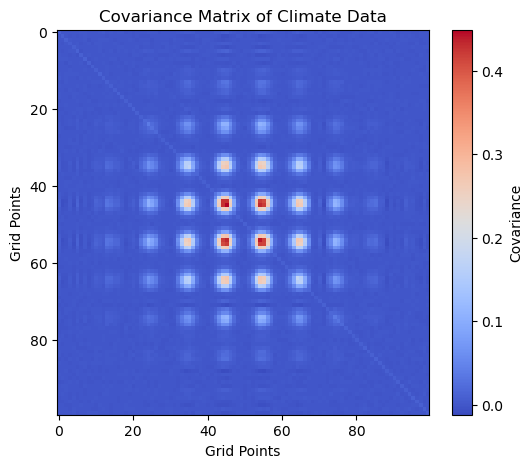

In [5]:
# Compute Covariance Matrix
cov_matrix = np.cov(data_centered, rowvar=False)
corr_matrix = np.corrcoef(data_centered, rowvar=False)  # Normalized covariance

# Visualize Covariance Matrix
plt.figure(figsize=(6, 5))
plt.imshow(cov_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Covariance')
plt.title('Covariance Matrix of Climate Data')
plt.xlabel('Grid Points')
plt.ylabel('Grid Points')
plt.show()

&#9989; Question 1: covariance matrix
: Can you explain the structure of the covariance matrix? What does it tell about spatial relationships?

Please answer question 1 in the form below

In [6]:
from IPython.display import IFrame
IFrame('https://docs.google.com/forms/d/e/1FAIpQLSeREislKV7hrOyKO7_oMKSM3MfMtL38UGxYax5LDTBQ0g8sDg/viewform?embedded=true', 750, 350)

### Step 3: Apply EOF (PCA) analysis

In [7]:
# Apply EOF (PCA) analysis
pca = PCA(n_components=5)  # Extract first 5 EOFs
pca.fit(data_centered)
transformed_data = pca.transform(data_centered)
explained_variance = pca.explained_variance_ratio_  # Get explained variance for each mode


### Step 4: Visualize EOF patterns and their corresponding time series

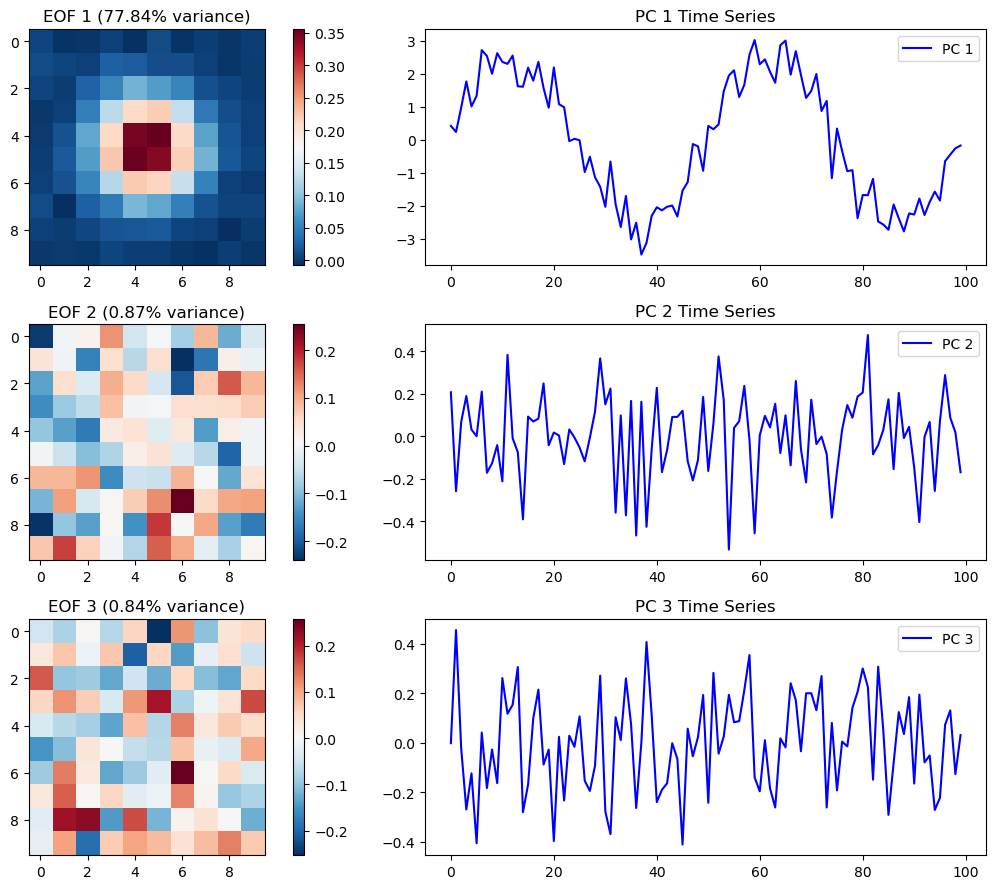

In [8]:
# Plot first 3 EOFs and their time series
fig, axes = plt.subplots(3, 2, figsize=(12, 9))  # 3 rows, 2 columns
for i in range(3):  # Plot first 3 EOFs and their time series
    # EOF spatial pattern
    eof_pattern = pca.components_[i].reshape(n_lat, n_lon)
    im = axes[i, 0].imshow(eof_pattern, cmap='RdBu_r')
    axes[i, 0].set_title(f'EOF {i+1} ({explained_variance[i]*100:.2f}% variance)')
    fig.colorbar(im, ax=axes[i, 0])
    
    # Principal component time series
    axes[i, 1].plot(transformed_data[:, i], label=f'PC {i+1}', color='b')
    axes[i, 1].set_title(f'PC {i+1} Time Series')
    axes[i, 1].legend()

plt.tight_layout()
plt.show()

&#9989; Question 2: variance explained
: - How many EOFs are needed to explain at least 90% of the total variance?
: - How does this change with different noise levels and what does this imply about the dominant spatial patterns?
: - How does adding noise impact the EOF decomposition?

&#9989; Question 3: computed components
: - What happens if you change the number of components computed in the PCA function? How does this affect the results?

&#9989; Bonus question: spatial structure
: - Modify the 'spatial_pattern' function to create a different pattern or add another pattern
: - How does changing the spatial correlation affect the EOF results?


Please answer in the form below

In [2]:
from IPython.display import IFrame
IFrame('https://docs.google.com/forms/d/e/1FAIpQLSeREislKV7hrOyKO7_oMKSM3MfMtL38UGxYax5LDTBQ0g8sDg/viewform?embedded=true', 900, 1000)